In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

This Project is Divided Into 3 section Data Cleaning and Pre Processing

Section 1 : Data PreProcessing 

Check if GPU is Available

In [2]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Selected device:", device)

if device.type == "cuda":
    gpu_index = 0
    print("Selected GPU:", torch.cuda.get_device_name(gpu_index))
    torch.cuda.set_device(gpu_index)

Selected device: cuda
Selected GPU: NVIDIA RTX 6000 Ada Generation


SECTION 1.1 : Seting Up DataFrames

Train Data

In [3]:
import os
import pandas as pd

paths = []
labels = []
for bird_type in os.listdir("/usr/cs/grad/masters/2025/dpawar/birds-525/train"):
    cur_path = os.path.join("/usr/cs/grad/masters/2025/dpawar/birds-525/train",bird_type)
    path_data = os.listdir(cur_path)
    paths.extend([os.path.join(cur_path,img) for img in path_data])
    labels.extend([bird_type]*len(path_data))

df_train = pd.DataFrame({"path":paths,"label":labels})

print("Shape of df_train is: ", df_train.shape)
df_train.head(10)

Shape of df_train is:  (84635, 2)


,path,label
0,/usr/cs/grad/masters/2025/dpawar/birds-525/tra...,AFRICAN CROWNED CRANE
1,/usr/cs/grad/masters/2025/dpawar/birds-525/tra...,AFRICAN CROWNED CRANE
2,/usr/cs/grad/masters/2025/dpawar/birds-525/tra...,AFRICAN CROWNED CRANE
3,/usr/cs/grad/masters/2025/dpawar/birds-525/tra...,AFRICAN CROWNED CRANE
4,/usr/cs/grad/masters/2025/dpawar/birds-525/tra...,AFRICAN CROWNED CRANE
5,/usr/cs/grad/masters/2025/dpawar/birds-525/tra...,AFRICAN CROWNED CRANE
6,/usr/cs/grad/masters/2025/dpawar/birds-525/tra...,AFRICAN CROWNED CRANE
7,/usr/cs/grad/masters/2025/dpawar/birds-525/tra...,AFRICAN CROWNED CRANE
8,/usr/cs/grad/masters/2025/dpawar/birds-525/tra...,AFRICAN CROWNED CRANE
9,/usr/cs/grad/masters/2025/dpawar/birds-525/tra...,AFRICAN CROWNED CRANE


Validation DataFrame

In [4]:
paths = []
labels = []
for bird_type in os.listdir("/usr/cs/grad/masters/2025/dpawar/birds-525/valid"):
    cur_path = os.path.join("/usr/cs/grad/masters/2025/dpawar/birds-525/valid",bird_type)
    path_data = os.listdir(cur_path)
    paths.extend([os.path.join(cur_path,img) for img in path_data])
    labels.extend([bird_type]*len(path_data))

df_valid = pd.DataFrame({"path":paths,"label":labels})

print("Shape of df_valid is: ", df_valid.shape)
df_valid.head(10)

Shape of df_valid is:  (2625, 2)


,path,label
0,/usr/cs/grad/masters/2025/dpawar/birds-525/val...,AFRICAN CROWNED CRANE
1,/usr/cs/grad/masters/2025/dpawar/birds-525/val...,AFRICAN CROWNED CRANE
2,/usr/cs/grad/masters/2025/dpawar/birds-525/val...,AFRICAN CROWNED CRANE
3,/usr/cs/grad/masters/2025/dpawar/birds-525/val...,AFRICAN CROWNED CRANE
4,/usr/cs/grad/masters/2025/dpawar/birds-525/val...,AFRICAN CROWNED CRANE
5,/usr/cs/grad/masters/2025/dpawar/birds-525/val...,AFRICAN OYSTER CATCHER
6,/usr/cs/grad/masters/2025/dpawar/birds-525/val...,AFRICAN OYSTER CATCHER
7,/usr/cs/grad/masters/2025/dpawar/birds-525/val...,AFRICAN OYSTER CATCHER
8,/usr/cs/grad/masters/2025/dpawar/birds-525/val...,AFRICAN OYSTER CATCHER
9,/usr/cs/grad/masters/2025/dpawar/birds-525/val...,AFRICAN OYSTER CATCHER


In [6]:
paths = []
labels = []
for bird_type in os.listdir("/usr/cs/grad/masters/2025/dpawar/birds-525/test"):
    cur_path = os.path.join("/usr/cs/grad/masters/2025/dpawar/birds-525/test",bird_type)
    path_data = os.listdir(cur_path)
    paths.extend([os.path.join(cur_path,img) for img in path_data])
    labels.extend([bird_type]*len(path_data))

df_test = pd.DataFrame({"path":paths,"label":labels})

print("Shape of df_test is: ", df_test.shape)
df_test.head(10)

Shape of df_test is:  (2625, 2)


,path,label
0,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN CROWNED CRANE
1,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN CROWNED CRANE
2,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN CROWNED CRANE
3,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN CROWNED CRANE
4,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN CROWNED CRANE
5,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN OYSTER CATCHER
6,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN OYSTER CATCHER
7,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN OYSTER CATCHER
8,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN OYSTER CATCHER
9,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN OYSTER CATCHER


No of Species of Brids are in the Dataset

In [7]:
print("How many species of birds are there in dataset: ", df_train['label'].nunique())

How many species of birds are there in dataset:  525


No of Lables

In [8]:
df_train['label'].value_counts()

label
RUFOUS TREPE              263
HOUSE FINCH               248
OVENBIRD                  233
D-ARNAUDS BARBET          233
ASIAN GREEN BEE EATER     220
                         ... 
NORTHERN RED BISHOP       130
AMETHYST WOODSTAR         130
RED TAILED THRUSH         130
SNOWY PLOVER              130
EURASIAN GOLDEN ORIOLE    130
Name: count, Length: 525, dtype: int64

Data Visualization Labels and Sample

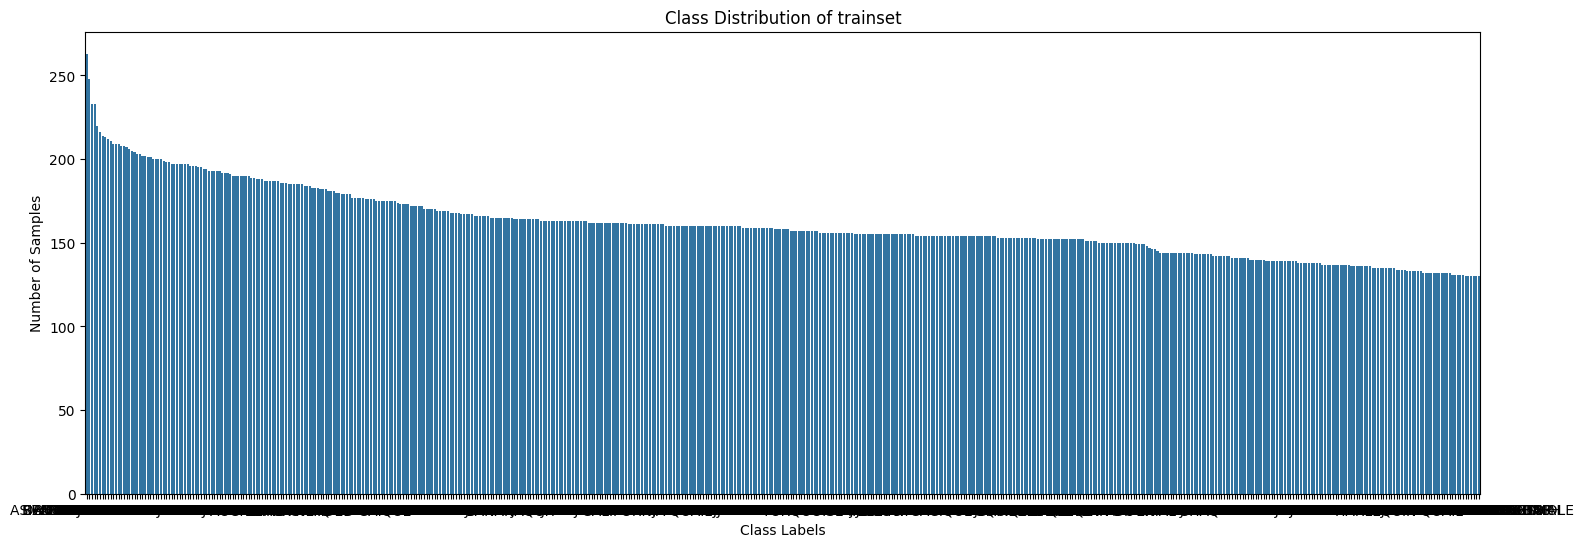

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = df_train['label']
label_counts = labels.value_counts()

plt.figure(figsize=(18, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Class Distribution of trainset')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

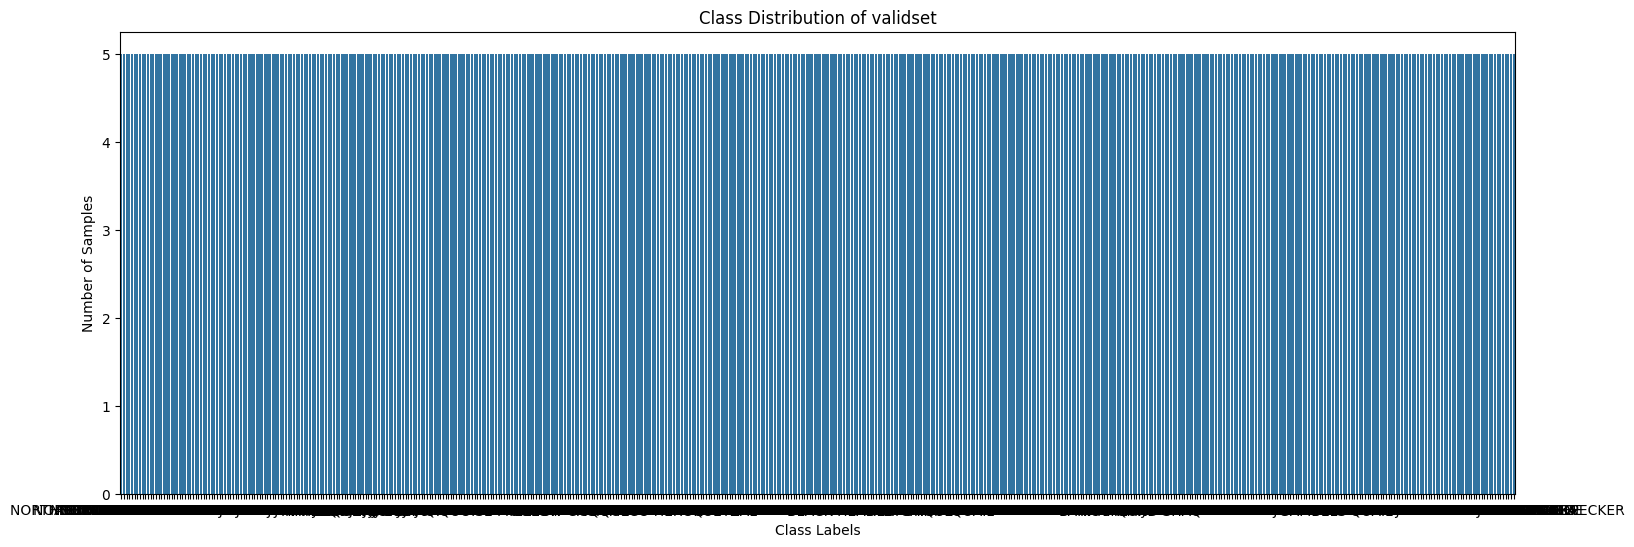

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = df_valid['label']
label_counts = labels.value_counts()

plt.figure(figsize=(18, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Class Distribution of validset')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

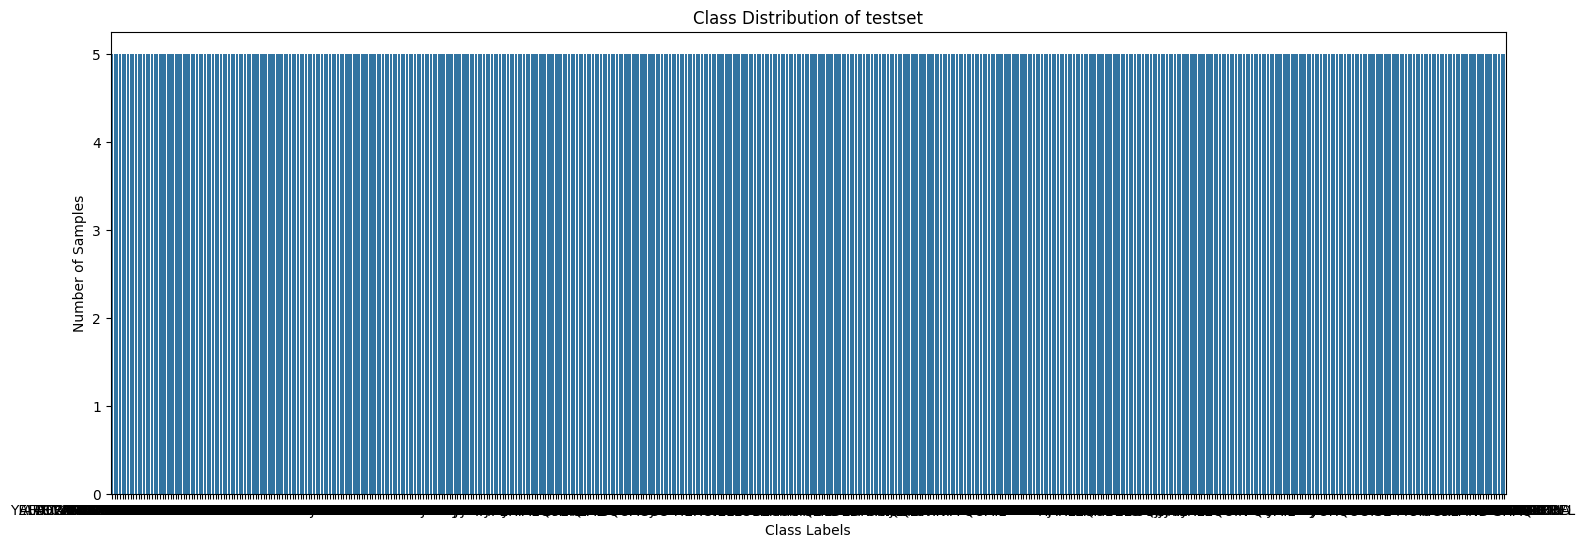

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

labels = df_test['label']
label_counts = labels.value_counts()

plt.figure(figsize=(18, 6))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.title('Class Distribution of testset')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.show()

In [11]:
df_train['label'] = df_train['label'].replace('PARAKETT  AUKLET', 'PARAKETT AUKLET')
df_test['label'] = df_test['label'].replace('PARAKETT  AUKLET', 'PARAKETT AUKLET')

In [13]:
# mapping data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#df_train['label'] = le.fit_transform(df_train['label'])
#df_valid['label'] = le.transform(df_valid['label'])
#df_test['label'] = le.transform(df_test['label'])

print("Shape of df_train is: ", df_train.shape)
print("Shape of df_valid is: ", df_valid.shape)
print("Shape of df_test is: ", df_test.shape)

df_test.head(7)

Shape of df_train is:  (84635, 2)
Shape of df_valid is:  (2625, 2)
Shape of df_test is:  (2625, 2)


,path,label
0,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN CROWNED CRANE
1,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN CROWNED CRANE
2,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN CROWNED CRANE
3,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN CROWNED CRANE
4,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN CROWNED CRANE
5,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN OYSTER CATCHER
6,/usr/cs/grad/masters/2025/dpawar/birds-525/tes...,AFRICAN OYSTER CATCHER


View Images

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir,target_class):
  # setting up the image directory
  target_folder = target_dir

  #read image and plotting it
  img = mpimg.imread(target_folder)
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  print(f"Path : {target_folder}")
  
  return img

Image shape: (224, 224, 3)
Path : /usr/cs/grad/masters/2025/dpawar/birds-525/test/ASHY STORM PETREL/5.jpg


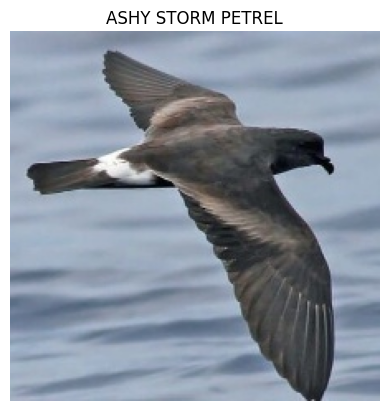

In [15]:
img = view_random_image(str(df_test['path'].values[99]), str(df_test['label'].values[99]))

Classification Model: 

In [16]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Conv2D,Add,MaxPooling2D, Dense, BatchNormalization,Input,Flatten, Dropout,GlobalMaxPooling2D,Lambda
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator 

2024-03-13 23:53:34.892539: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-13 23:53:37.539065: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 23:53:47.313545: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [16]:
# import tensorflow as tf
# from tensorflow.keras import layers, models

# # Define the model
# model = models.Sequential()

# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(224,224, 3)))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.25))

# model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.7))

# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(525, activation='softmax'))
# model.add(BatchNormalization())
# model.add(Dropout(0.1))
# model.add(Dense(525, activation='softmax'))
# # Compile the model
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['accuracy'])

# # Display the model summary
# model.summary()


In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(525, activation='softmax'))

model.summary()

/usr/cs/grad/masters/2025/dpawar/env/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
2024-03-13 23:54:06.083685: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22558 MB memory:  -> device: 0, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:4f:00.0, compute capability: 8.9
2024-03-13 23:54:06.092104: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 30191 MB memory:  -> device: 1, name: NVIDIA RTX 6000 Ada Generation, pci bus id: 0000:52:00.0, compute capability: 8.9
2024-03-13 23:54:06.102682: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 525)            │       134,925 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,379,597 (85.37 MB)

 Trainable params: 22,379,597 (85.37 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "/usr/cs/grad/masters/2025/dpawar/birds-525/train"
test_dir = "/usr/cs/grad/masters/2025/dpawar/birds-525/test"
val_dir = "/usr/cs/grad/masters/2025/dpawar/birds-525/valid"


# data transfer from directories to batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

val_data = valid_datagen.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "categorical")

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [21]:
steps_per_epoch = len(train_data)
validation_steps = int(0.25*len(val_data))
print("Steps per epoch:",steps_per_epoch)
print("Validation steps:",validation_steps)
                       

Steps per epoch: 2645
Validation steps: 20


In [22]:
model.compile(loss='categorical_crossentropy',
               optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(train_data,
           steps_per_epoch = len(train_data), epochs=5,
            batch_size=16,
            validation_data =val_data,
            validation_steps = int(0.25*len(val_data)))



Epoch 1/5


/usr/cs/grad/masters/2025/dpawar/env/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1710374201.359858 3774390 service.cc:145] XLA service 0x7f9d20005470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1710374201.359894 3774390 service.cc:153]   StreamExecutor device (0): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
I0000 00:00:1710374201.359900 3774390 service.cc:153]   StreamExecutor device (1): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
I0000 00:00:1710374201.359901 3774390 service.cc:153]   StreamExecutor device (2): NVIDIA RTX 6000 Ada Generation, Compute Capability 8.9
I0000 00:00:1710374

   2/2645 ━━━━━━━━━━━━━━━━━━━━ 2:28 56ms/step - accuracy: 0.0078 - loss: 6.7191       

I0000 00:00:1710374231.441824 3774390 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 410/2645 ━━━━━━━━━━━━━━━━━━━━ 6:32 176ms/step - accuracy: 0.0048 - loss: 6.2751

I0000 00:00:1710374306.620576 3781454 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1177', 540 bytes spill stores, 540 bytes spill loads

I0000 00:00:1710374306.671207 3781428 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1177', 544 bytes spill stores, 544 bytes spill loads

I0000 00:00:1710374307.197670 3781464 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_877', 204 bytes spill stores, 204 bytes spill loads



2645/2645 ━━━━━━━━━━━━━━━━━━━━ 519s 184ms/step - accuracy: 0.0252 - loss: 5.7896 - val_accuracy: 0.1766 - val_loss: 4.0966
Epoch 2/5


2024-03-14 00:05:17.750501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:05:17.750539: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2645/2645 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2000 - val_loss: 3.9631
Epoch 3/5
2645/2645 ━━━━━━━━━━━━━━━━━━━━ 427s 161ms/step - accuracy: 0.1527 - loss: 4.2916 - val_accuracy: 0.3625 - val_loss: 3.1884
Epoch 4/5


2024-03-14 00:12:28.244317: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-14 00:12:28.244354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-03-14 00:12:28.244369: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 9966112206667006867
2024-03-14 00:12:28.244383: I tensorflow/core/framework/local_rendezvous.cc:422] Local rendezvous recv item cancelled. Key hash: 3316453090544416536


2645/2645 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3766 - val_loss: 3.1340
Epoch 5/5
  65/2645 ━━━━━━━━━━━━━━━━━━━━ 6:36 154ms/step - accuracy: 0.2618 - loss: 3.4452

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print(f'Test Accuracy: {test_acc*100:.2f}%')

83/83 ━━━━━━━━━━━━━━━━━━━━ 14s 174ms/step - accuracy: 0.4402 - loss: 2.6492
Test Accuracy: 44.30%
